<a href="https://colab.research.google.com/github/rajsalla/Best-README-Template/blob/master/Classifying_Covid_19_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(14,8)}, font_scale=.9)


In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
model_directory = '/content/gdrive/MyDrive/keggle/Cleaned-Data.csv'
df = pd.read_csv(model_directory)
display(df)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


In [24]:
all_indicators = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender']
severity = ['Severity_Severe', 'Severity_Moderate']
important_indicators = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat']
combined = df[severity]
combined['combined'] = combined['Severity_Severe'] + combined['Severity_Moderate']
target_columns = ['Severity_Severe']

all_features = df[all_indicators]
important_features = df[important_indicators]
targets = df[target_columns]

display(all_features.head(), targets.head(), combined.head(10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Male,Gender_Female,Gender_Transgender
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0


,Severity_Severe
0,0
1,0
2,0
3,0
4,0


,Severity_Severe,Severity_Moderate,combined
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,1
4,0,1,1
5,0,1,1
6,1,0,1
7,1,0,1
8,1,0,1
9,0,0,0


# **Exploratory Data Analysis**

Severity Distribution shows the total number of severe and non-severe cases present in the data


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


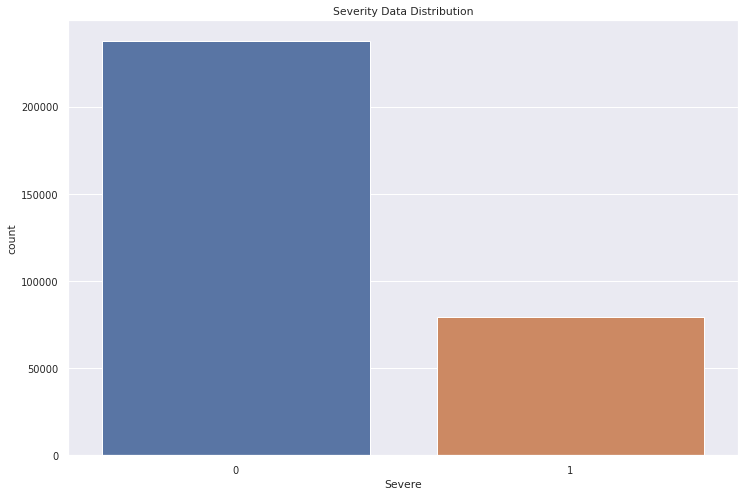

In [25]:
sns.set(rc={'figure.figsize':(12,8)}, font_scale=.9)
targets = targets.rename(columns={'Severity_Severe':'Severe'})
sns.countplot(targets['Severe'])
#combined = combined.rename(columns={'combined':'Severe'})
#sns.countplot(combined['Severe'])
plt.title("Severity Data Distribution")
plt.show()
sns.set(rc={'figure.figsize':(12,8)}, font_scale=.9)

**This shows the total count of each symptom occuring in the dataset which helps to understand which features are important**

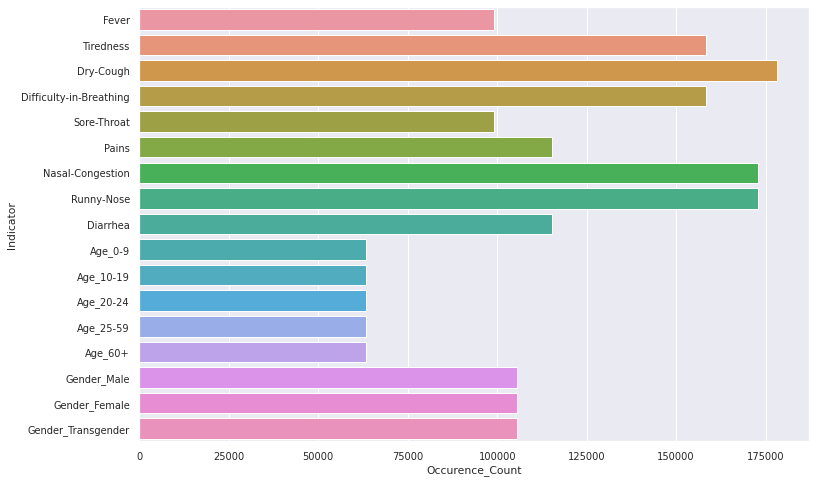

In [26]:
count_all = []
for i in all_indicators:
    count_all.append(sum(all_features[i].values))
count_df = pd.DataFrame({"Indicator":all_indicators, "Occurence_Count":count_all})
sns.barplot(data = count_df, y="Indicator", x="Occurence_Count")

**The Pie Chart Shows the distribution of important features in the data**

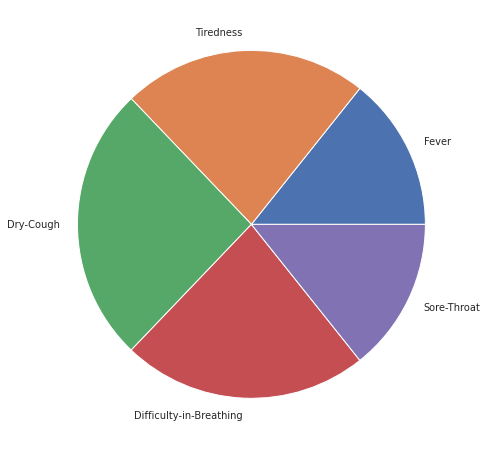

In [27]:
count_imp = []
for i in important_indicators:
    count_imp.append(sum(important_features[i].values))
count_imp_df = pd.DataFrame({"Indicator":important_indicators, "Occurence_Count":count_imp})
plt.pie(data=count_imp_df, x="Occurence_Count", labels=count_imp_df["Indicator"])
plt.show()

**This is the heat map which shows multicollinearity between features**

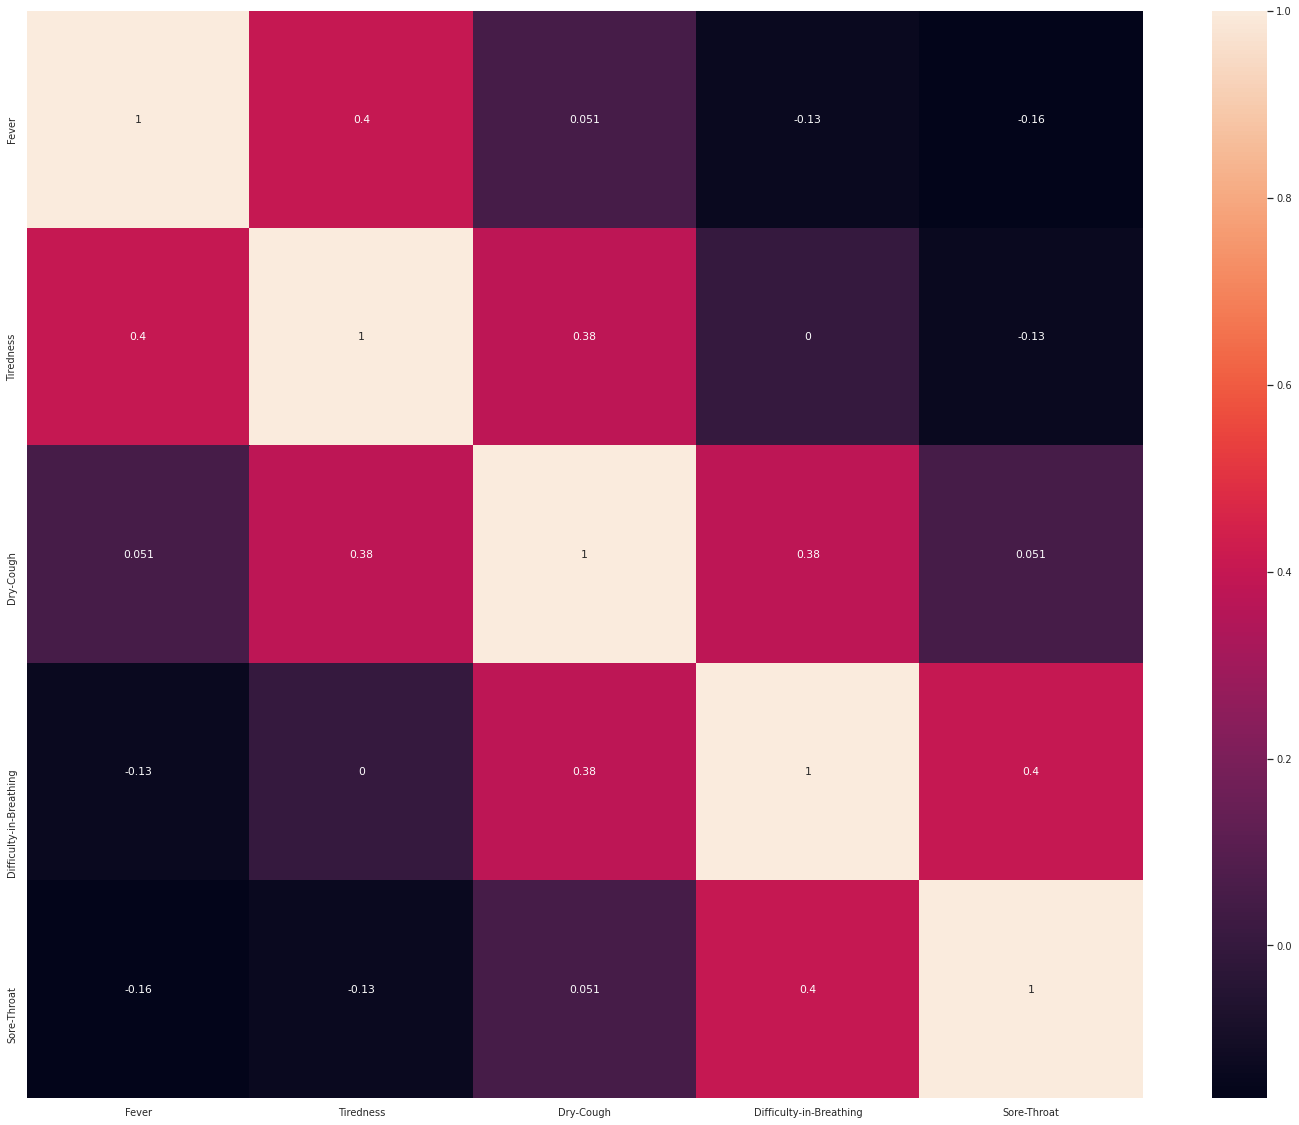

In [28]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(important_features.corr(), annot=True)
plt.savefig("Heatmap.png")

# Preparing data for analysis

In [29]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [30]:
data = all_features
data['Severe'] = targets['Severe'].values
#data['Severe'] = combined['Severe'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**This is the heatmap after the transformation of data**

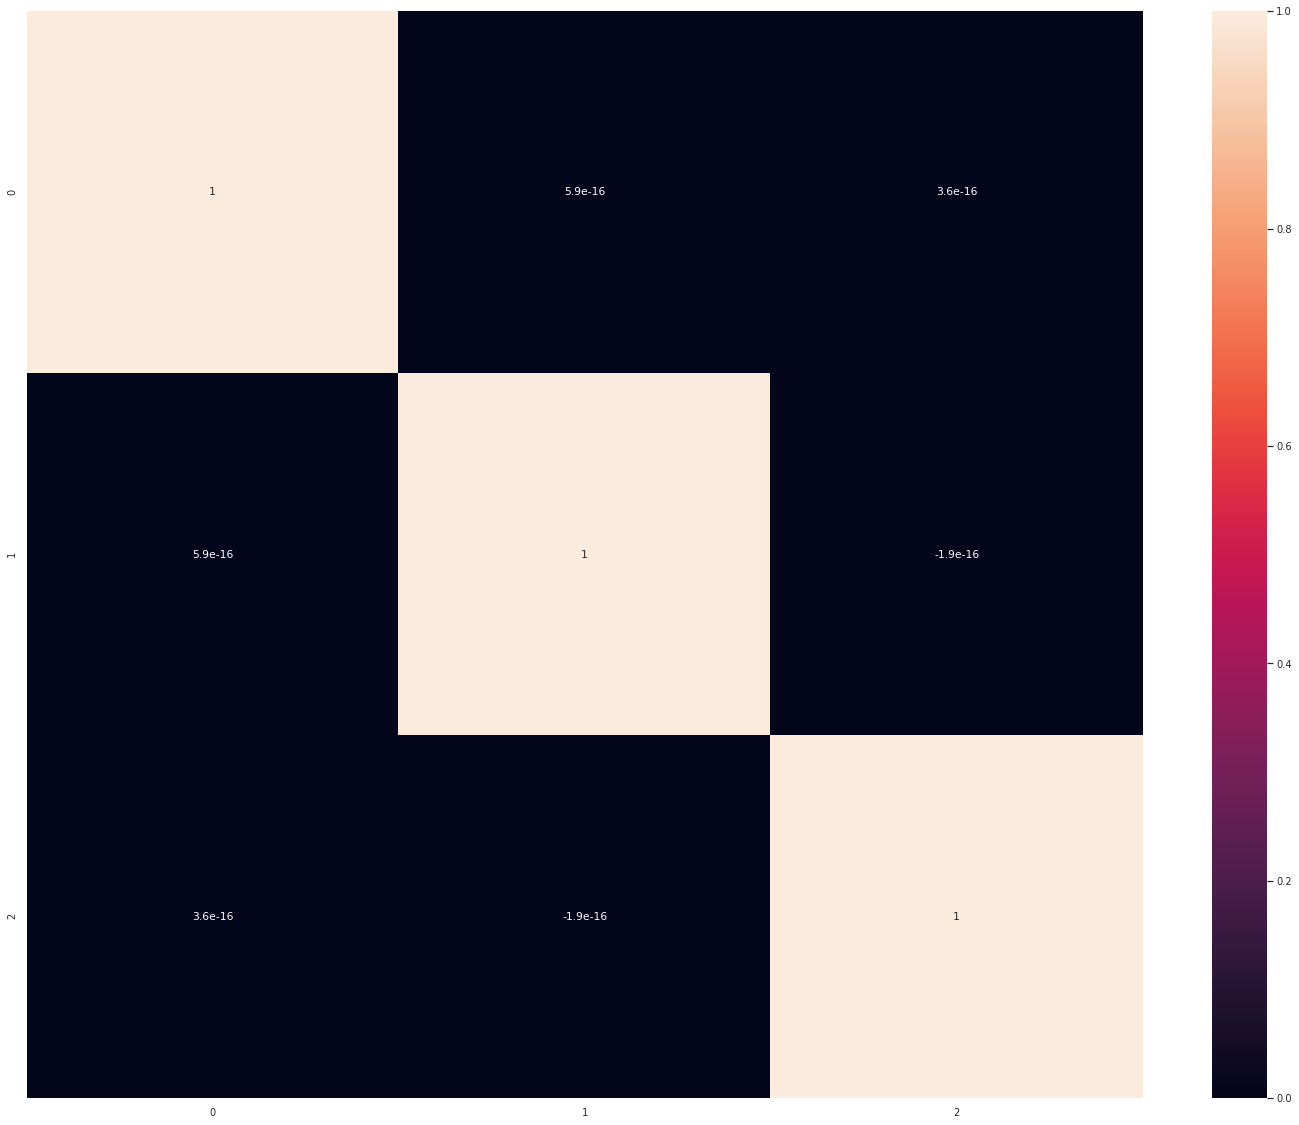

In [31]:
x = data.drop(['Severe'], axis=1)
x = PCA(n_components = 3).fit_transform(x)
y = data['Severe']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.3)

X_pca = pd.DataFrame(x)
fig = plt.figure(figsize=(25, 20))
sns.heatmap(X_pca.corr(), annot=True)

# Logistic Regression 

In [32]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = lr.predict(x_test)
y_true = y_test

from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 lr.predict(x_train)), 3))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 3))

Train accuracy: 0.75
Test accuracy: 0.751
